In [696]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lava18/google-play-store-apps")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\snrpc\.cache\kagglehub\datasets\lava18\google-play-store-apps\versions\6


### IMPORT DATA

In [697]:
import os

files = os.listdir(path)
print("files in directory", files)

files in directory ['googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'license.txt']


In [698]:
import pandas as pd
df=pd.read_csv(path + "/googleplaystore.csv")
df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [699]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [701]:
df.shape

(10841, 13)

In [702]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### NULL VALUE 

In [703]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [704]:
df[ df['Type'].isna()| df['Content Rating'].isna() | df['Android Ver'].isna() | df['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [705]:
dfcopy = df.dropna(subset=['Type', 'Content Rating', 'Android Ver', 'Current Ver'])

In [706]:
dfcopy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [707]:
dfcopy['Reviews'].str.isnumeric().sum()

10829

In [708]:
dfcopy['Type'].value_counts()

Type
Free    10032
Paid      797
Name: count, dtype: int64

In [709]:
dfcopy['Type'] = df['Type'].map({'Free': 0, 'Paid': 1})


C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\1930539463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy['Type'] = df['Type'].map({'Free': 0, 'Paid': 1})


In [710]:
dfcopy.describe()

,Rating,Type
count,9360.000000,10829.000000
mean,4.191838,0.073599
std,0.515263,0.261129
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.300000,0.000000
75%,4.500000,0.000000
max,5.000000,1.000000


In [711]:
import numpy as np

In [712]:
dfcopy['Size']=dfcopy['Size'].str.lower()
dfcopy['Size']=dfcopy['Size'].str.replace('k','')
dfcopy['Size']=dfcopy['Size'].str.replace('m','000')
dfcopy['Size']=dfcopy['Size'].replace('varies with device',np.nan)
dfcopy['Size']=dfcopy['Size'].astype(float)

C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\3966977622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy['Size']=dfcopy['Size'].str.lower()
C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\3966977622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy['Size']=dfcopy['Size'].str.replace('k','')
C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\3966977622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [713]:
dfcopy['Size'].size

10829

In [714]:
dfcopy['Size'].fillna(dfcopy['Size'].mean(), inplace=True)

C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\2789200858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy['Size'].fillna(dfcopy['Size'].mean(), inplace=True)


In [715]:
dfcopy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",0.0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",0.0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,"5,000,000+",0.0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",0.0,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,"100,000+",0.0,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",0.0,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100+,0.0,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.500000,"1,000+",0.0,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,19597.990848,"1,000+",0.0,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [716]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          9360 non-null   float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  float64
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


In [717]:
df['Price'].unique() 

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [718]:
dfcopy['Price']=dfcopy['Price'].replace('Everyone',np.nan)
dfcopy['Price']=dfcopy['Price'].str.replace('$','').astype(float)   

C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\3893364510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy['Price']=dfcopy['Price'].replace('Everyone',np.nan)
C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\3893364510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy['Price']=dfcopy['Price'].str.replace('$','').astype(float)


In [719]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          9360 non-null   float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  float64
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


In [720]:
dfcopy['Installs']=dfcopy['Installs'].str.replace(',','')
dfcopy['Installs']=dfcopy['Installs'].str.replace('.','')


dfcopy['Installs']=dfcopy['Installs'].str.replace('+','').astype(float)   

C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\2452525094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy['Installs']=dfcopy['Installs'].str.replace(',','')
C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\2452525094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy['Installs']=dfcopy['Installs'].str.replace('.','')
C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\2452525094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [721]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          9360 non-null   float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  float64
 6   Type            10829 non-null  float64
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.2+ MB


In [722]:
import datetime

In [723]:
dfcopy['Last Updated'] = pd.to_datetime(dfcopy['Last Updated'])

C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\943950026.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfcopy['Last Updated'] = pd.to_datetime(dfcopy['Last Updated'])
C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\943950026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy['Last Updated'] = pd.to_datetime(dfcopy['Last Updated'])


In [724]:
dfcopy['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10829, dtype: datetime64[ns]

In [725]:
dfcopy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000.0,0.0,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000.0,0.0,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000.0,0.0,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000.0,0.0,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,100000.0,0.0,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000.0,0.0,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100.0,0.0,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.500000,1000.0,0.0,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,19597.990848,1000.0,0.0,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [726]:
dfcopy['App'].duplicated().sum()




1181

In [727]:
dfcopy.drop_duplicates(subset='App', keep='first', inplace=True)

C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\3956086542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy.drop_duplicates(subset='App', keep='first', inplace=True)


In [728]:
dfcopy.shape

(9648, 13)

In [729]:
import seaborn as sns

C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\4196974558.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dfcopy['Rating'], shade=True)


<Axes: xlabel='Rating', ylabel='Density'>

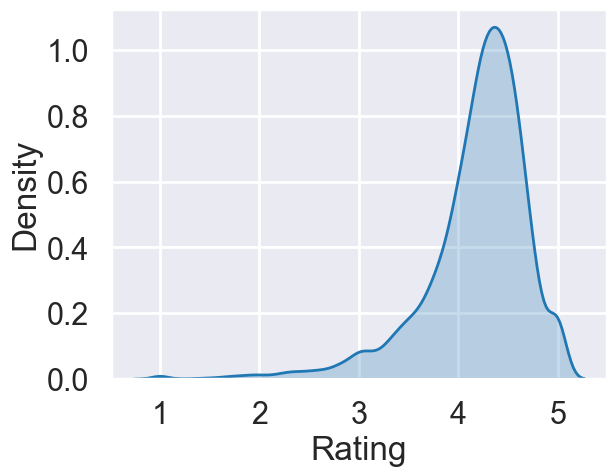

In [730]:
sns.kdeplot(dfcopy['Rating'], shade=True)




C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\123349863.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dfcopy['Size'], shade=True)


<Axes: xlabel='Size', ylabel='Density'>

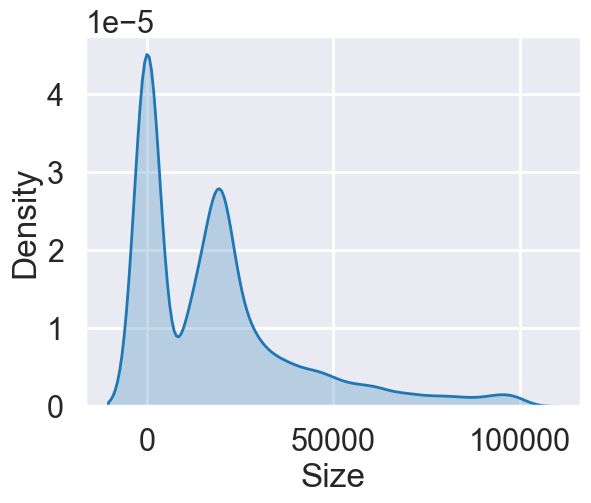

In [731]:
sns.kdeplot(dfcopy['Size'], shade=True)


C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\569708336.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dfcopy['Installs'], shade=True)


<Axes: xlabel='Installs', ylabel='Density'>

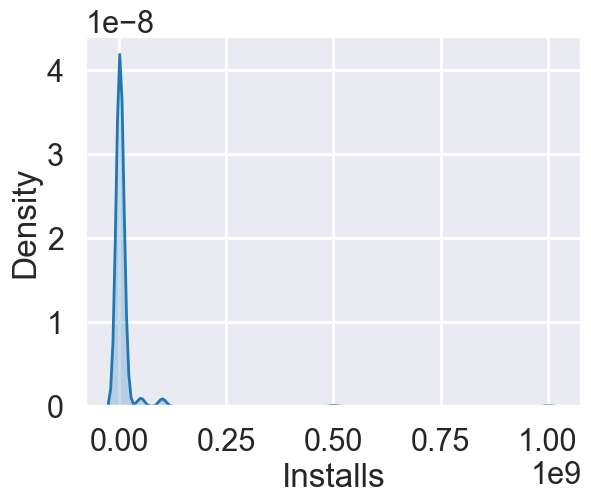

In [732]:
sns.kdeplot(dfcopy['Installs'], shade=True)


C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\684101696.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dfcopy['Price'], shade=True)


<Axes: xlabel='Price', ylabel='Density'>

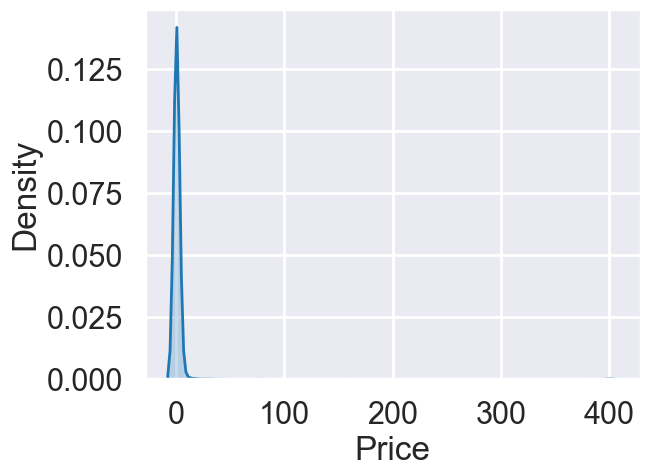

In [733]:
sns.kdeplot(dfcopy['Price'], shade=True)

In [734]:
import matplotlib.pyplot as plt


In [735]:
numeric_features = [feature for feature in dfcopy.columns if dfcopy[feature].dtype != 'O']
categorical_features = [feature for feature in dfcopy.columns if dfcopy[feature].dtype == 'O']

In [736]:
print(numeric_features)
print(categorical_features)

['Rating', 'Size', 'Installs', 'Type', 'Price', 'Last Updated']
['App', 'Category', 'Reviews', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\2146823374.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=dfcopy[numeric_features[i]],shade=True, color='r')
C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\2146823374.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=dfcopy[numeric_features[i]],shade=True, color='r')
C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\2146823374.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=dfcopy[numeric_features[i]],shade=True, color='r')
C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\2146823374.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; 

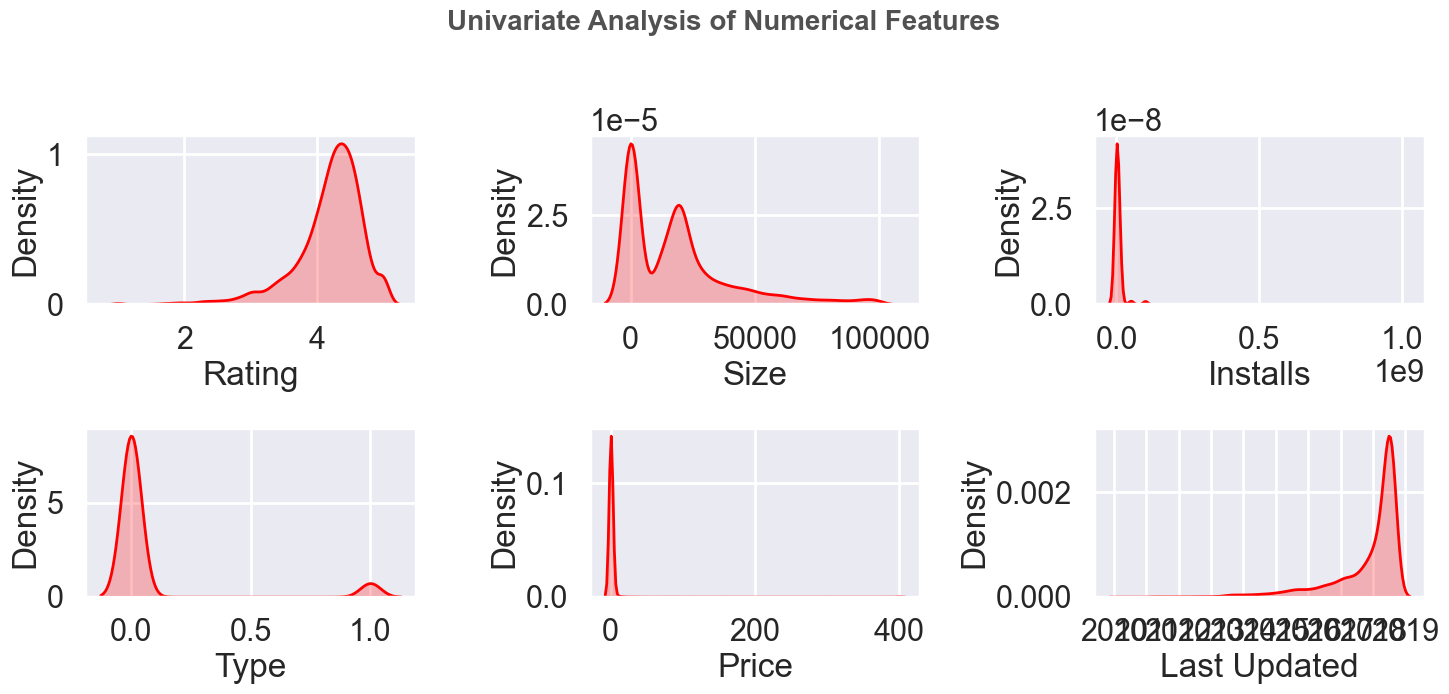

In [737]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=dfcopy[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\3008872704.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]],palette="Set2")
C:\Users\snrpc\AppData\Local\Temp\ipykernel_14592\3008872704.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]],palette="Set2")


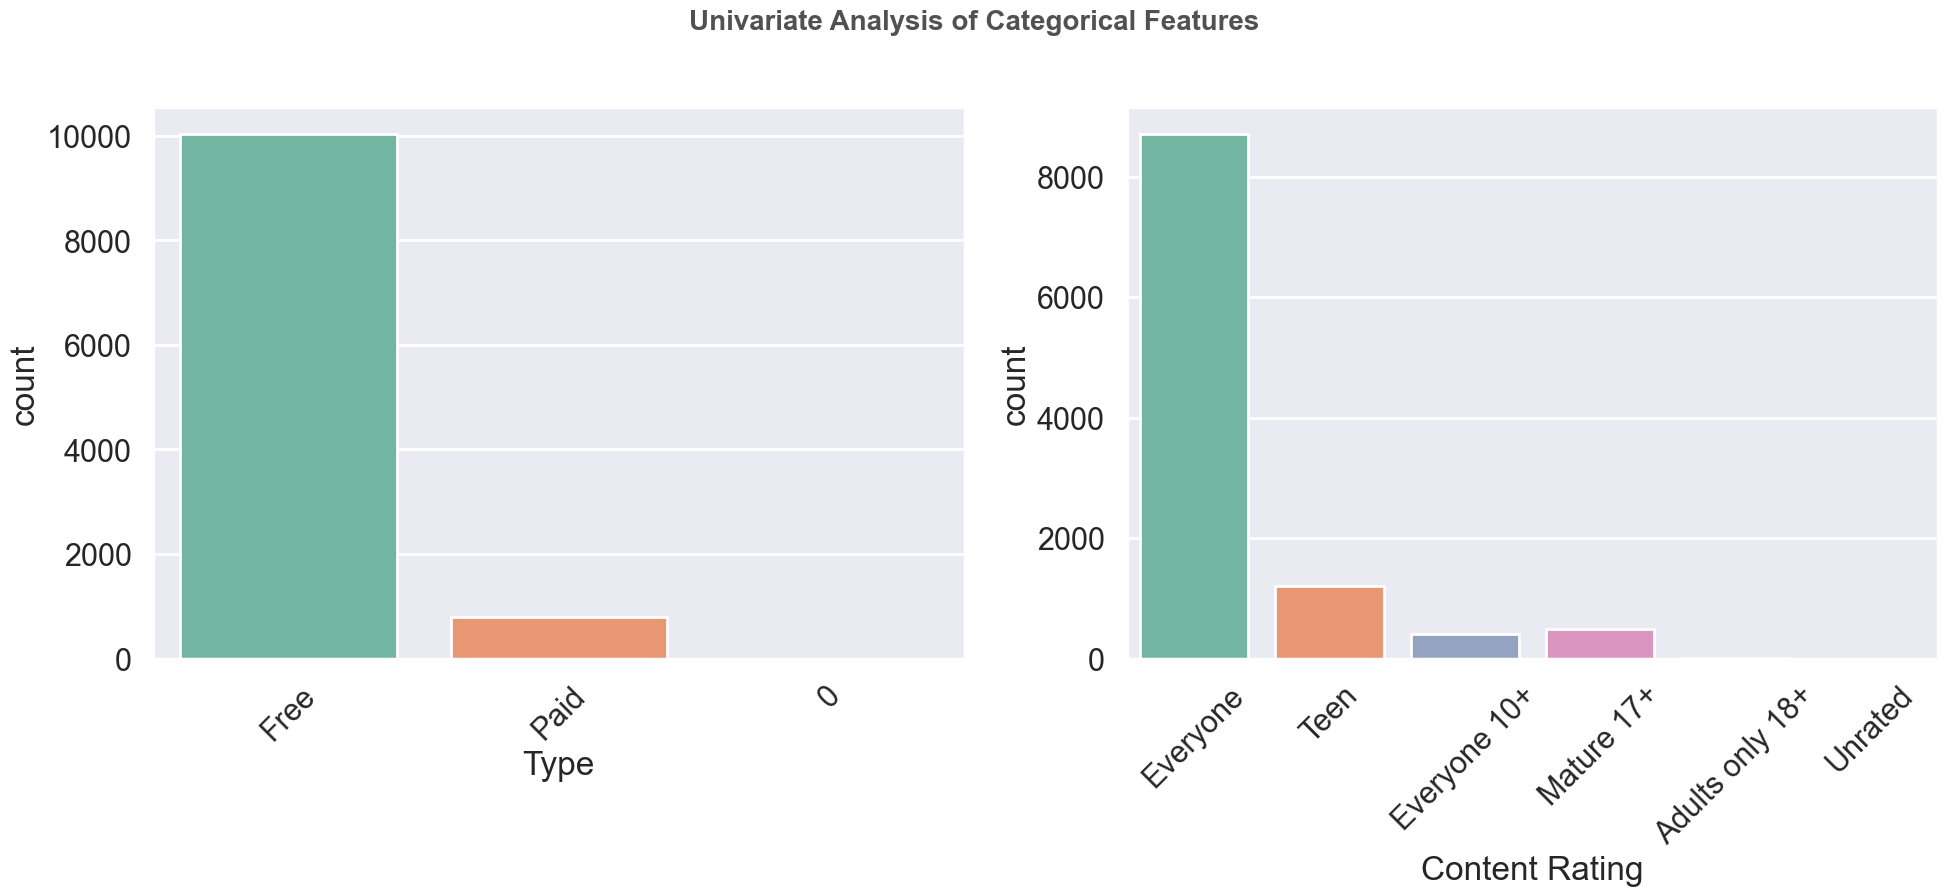

In [738]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

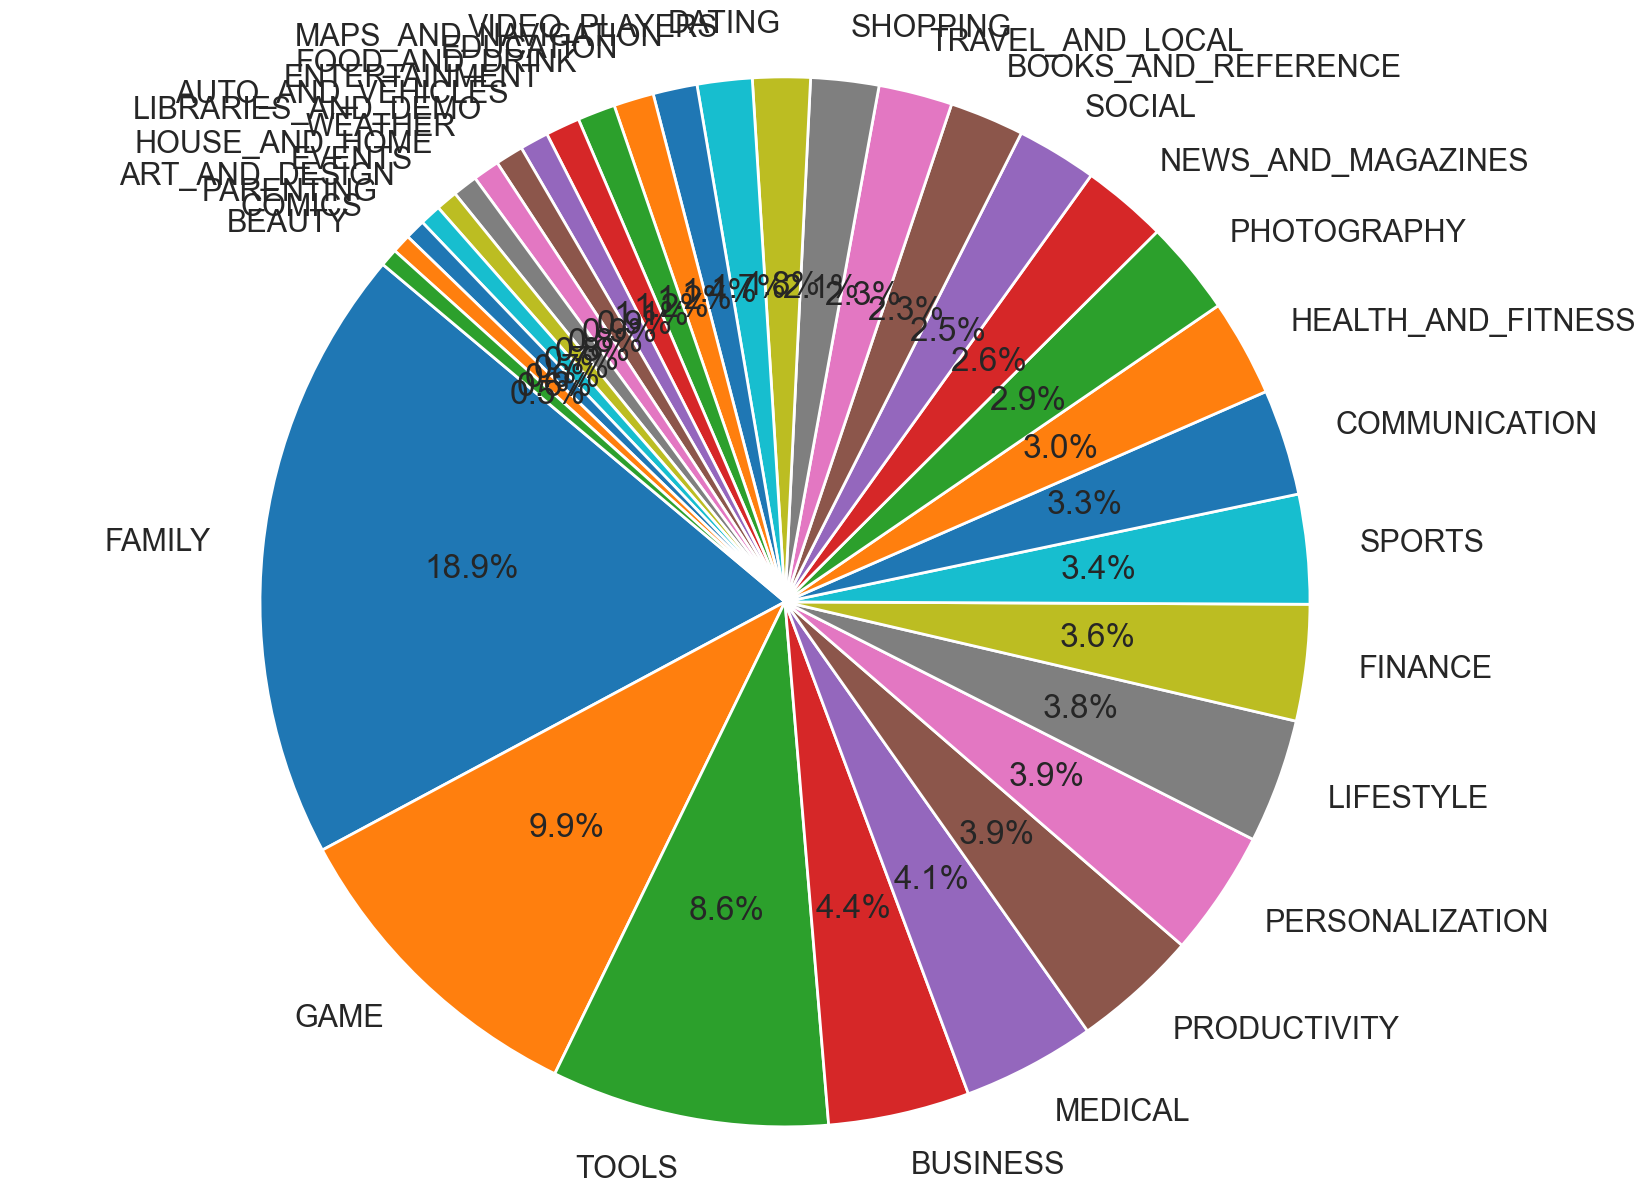

In [739]:
plt.figure(figsize=(20, 15))
plt.pie(dfcopy['Category'] .value_counts(), labels=dfcopy['Category'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

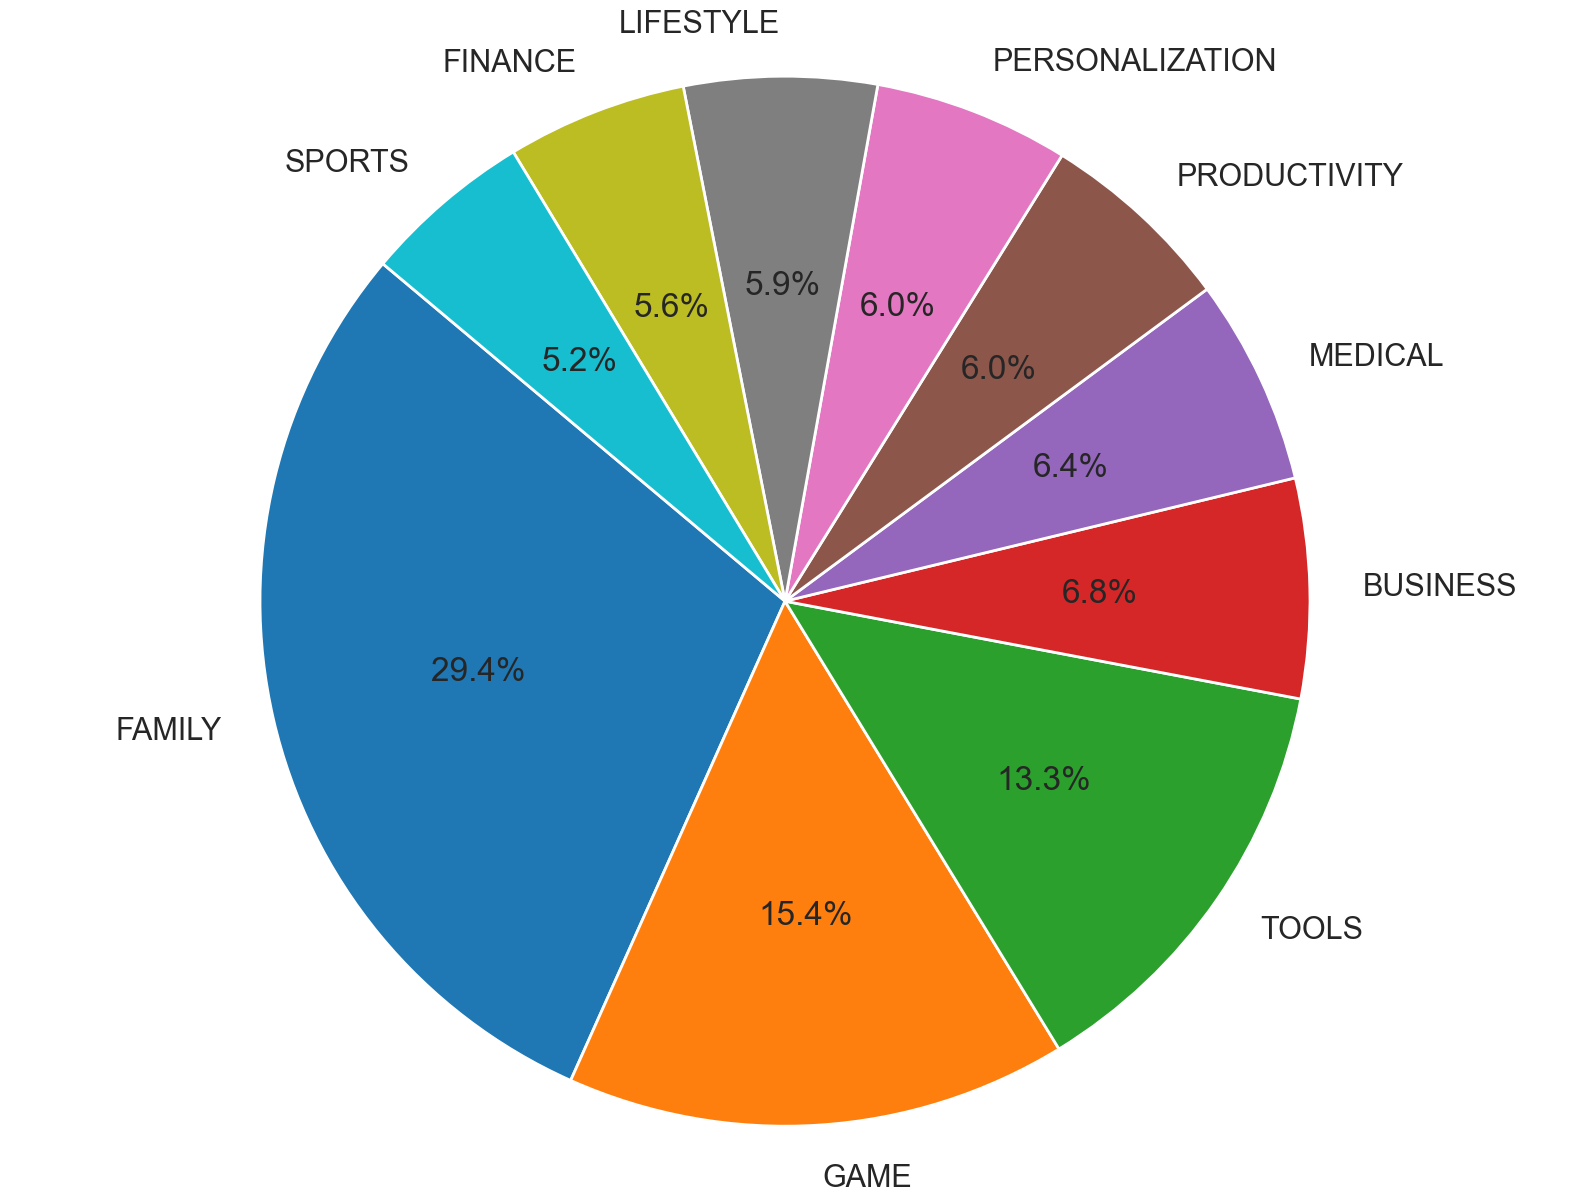

In [740]:
#top 10 category


plt.figure(figsize=(20, 15))
plt.pie(dfcopy['Category'] .value_counts().head(10), labels=dfcopy['Category'].value_counts().head(10).index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [741]:
dfcopy.groupby(['Category'])['Installs'].sum()

Category
ART_AND_DESIGN         1.143331e+08
AUTO_AND_VEHICLES      5.313021e+07
BEAUTY                 2.719705e+07
BOOKS_AND_REFERENCE    1.665969e+09
BUSINESS               6.971649e+08
COMICS                 4.498115e+07
COMMUNICATION          1.103828e+10
DATING                 1.409261e+08
EDUCATION              3.529520e+08
ENTERTAINMENT          2.113660e+09
EVENTS                 1.597316e+07
FAMILY                 4.427881e+09
FINANCE                4.553487e+08
FOOD_AND_DRINK         2.117988e+08
GAME                   1.387892e+10
HEALTH_AND_FITNESS     1.144023e+09
HOUSE_AND_HOME         9.721246e+07
LIBRARIES_AND_DEMO     5.199591e+07
LIFESTYLE              5.038235e+08
MAPS_AND_NAVIGATION    5.032819e+08
MEDICAL                3.819318e+07
NEWS_AND_MAGAZINES     2.369218e+09
PARENTING              3.152111e+07
PERSONALIZATION        1.532484e+09
PHOTOGRAPHY            4.649148e+09
PRODUCTIVITY           5.793091e+09
SHOPPING               1.400349e+09
SOCIAL             

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

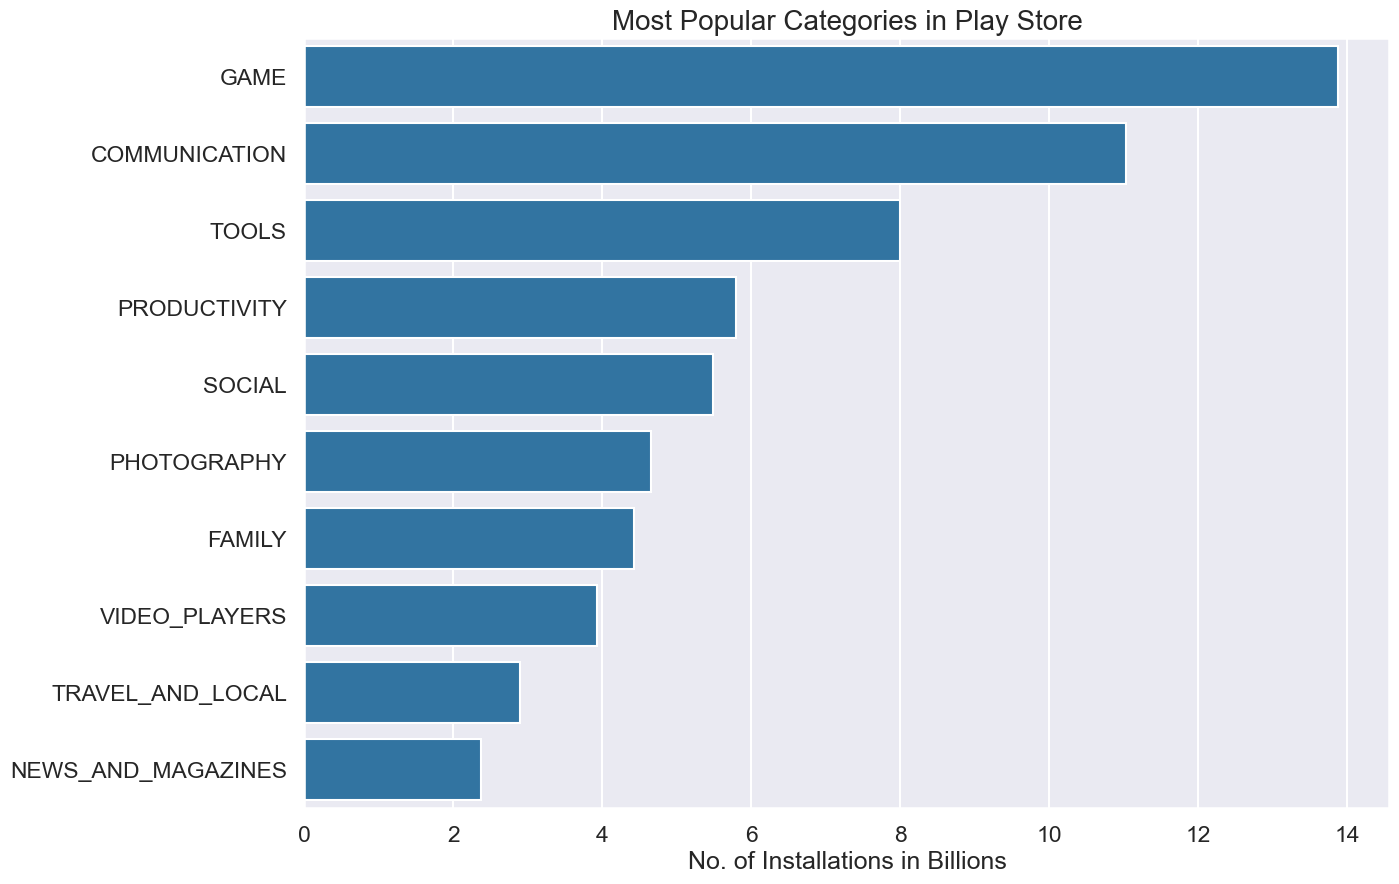

In [742]:
df_cat_installs = dfcopy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

In [743]:
dfa = dfcopy.groupby(['Category' ,'App'])['Installs'].sum().reset_index()


In [744]:
dfa

,Category,App,Installs
0,ART_AND_DESIGN,350 Diy Room Decor Ideas,10000.0
1,ART_AND_DESIGN,3D Color Pixel by Number - Sandbox Art Coloring,100000.0
2,ART_AND_DESIGN,AJ Styles HD Wallpapers,5000.0
3,ART_AND_DESIGN,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,1000.0
4,ART_AND_DESIGN,Ai illustrator viewer,100000.0
...,...,...,...
9643,WEATHER,Yahoo Weather,10000000.0
9644,WEATHER,Yahoo! Weather for SH Forecast for understandi...,1000000.0
9645,WEATHER,Yandex.Weather,10000000.0
9646,WEATHER,weather - weather forecast,1000000.0


In [745]:
dfa = dfa.sort_values('Installs', ascending = False)


In [746]:
dfa

,Category,App,Installs
4767,GAME,Subway Surfers,1.000000e+09
1532,ENTERTAINMENT,Google Play Games,1.000000e+09
9555,VIDEO_PLAYERS,YouTube,1.000000e+09
1143,COMMUNICATION,Skype - free IM & video calls,1.000000e+09
1062,COMMUNICATION,Hangouts,1.000000e+09
...,...,...,...
52,ART_AND_DESIGN,Test Application DT 02,0.000000e+00
1739,FAMILY,AP Series Solution Pro,0.000000e+00
1795,FAMILY,Ain Arabic Kids Alif Ba ta,0.000000e+00
3656,FINANCE,Eu sou Rico,0.000000e+00


In [751]:
apps=df2['Category'].unique()
apps=apps.tolist()

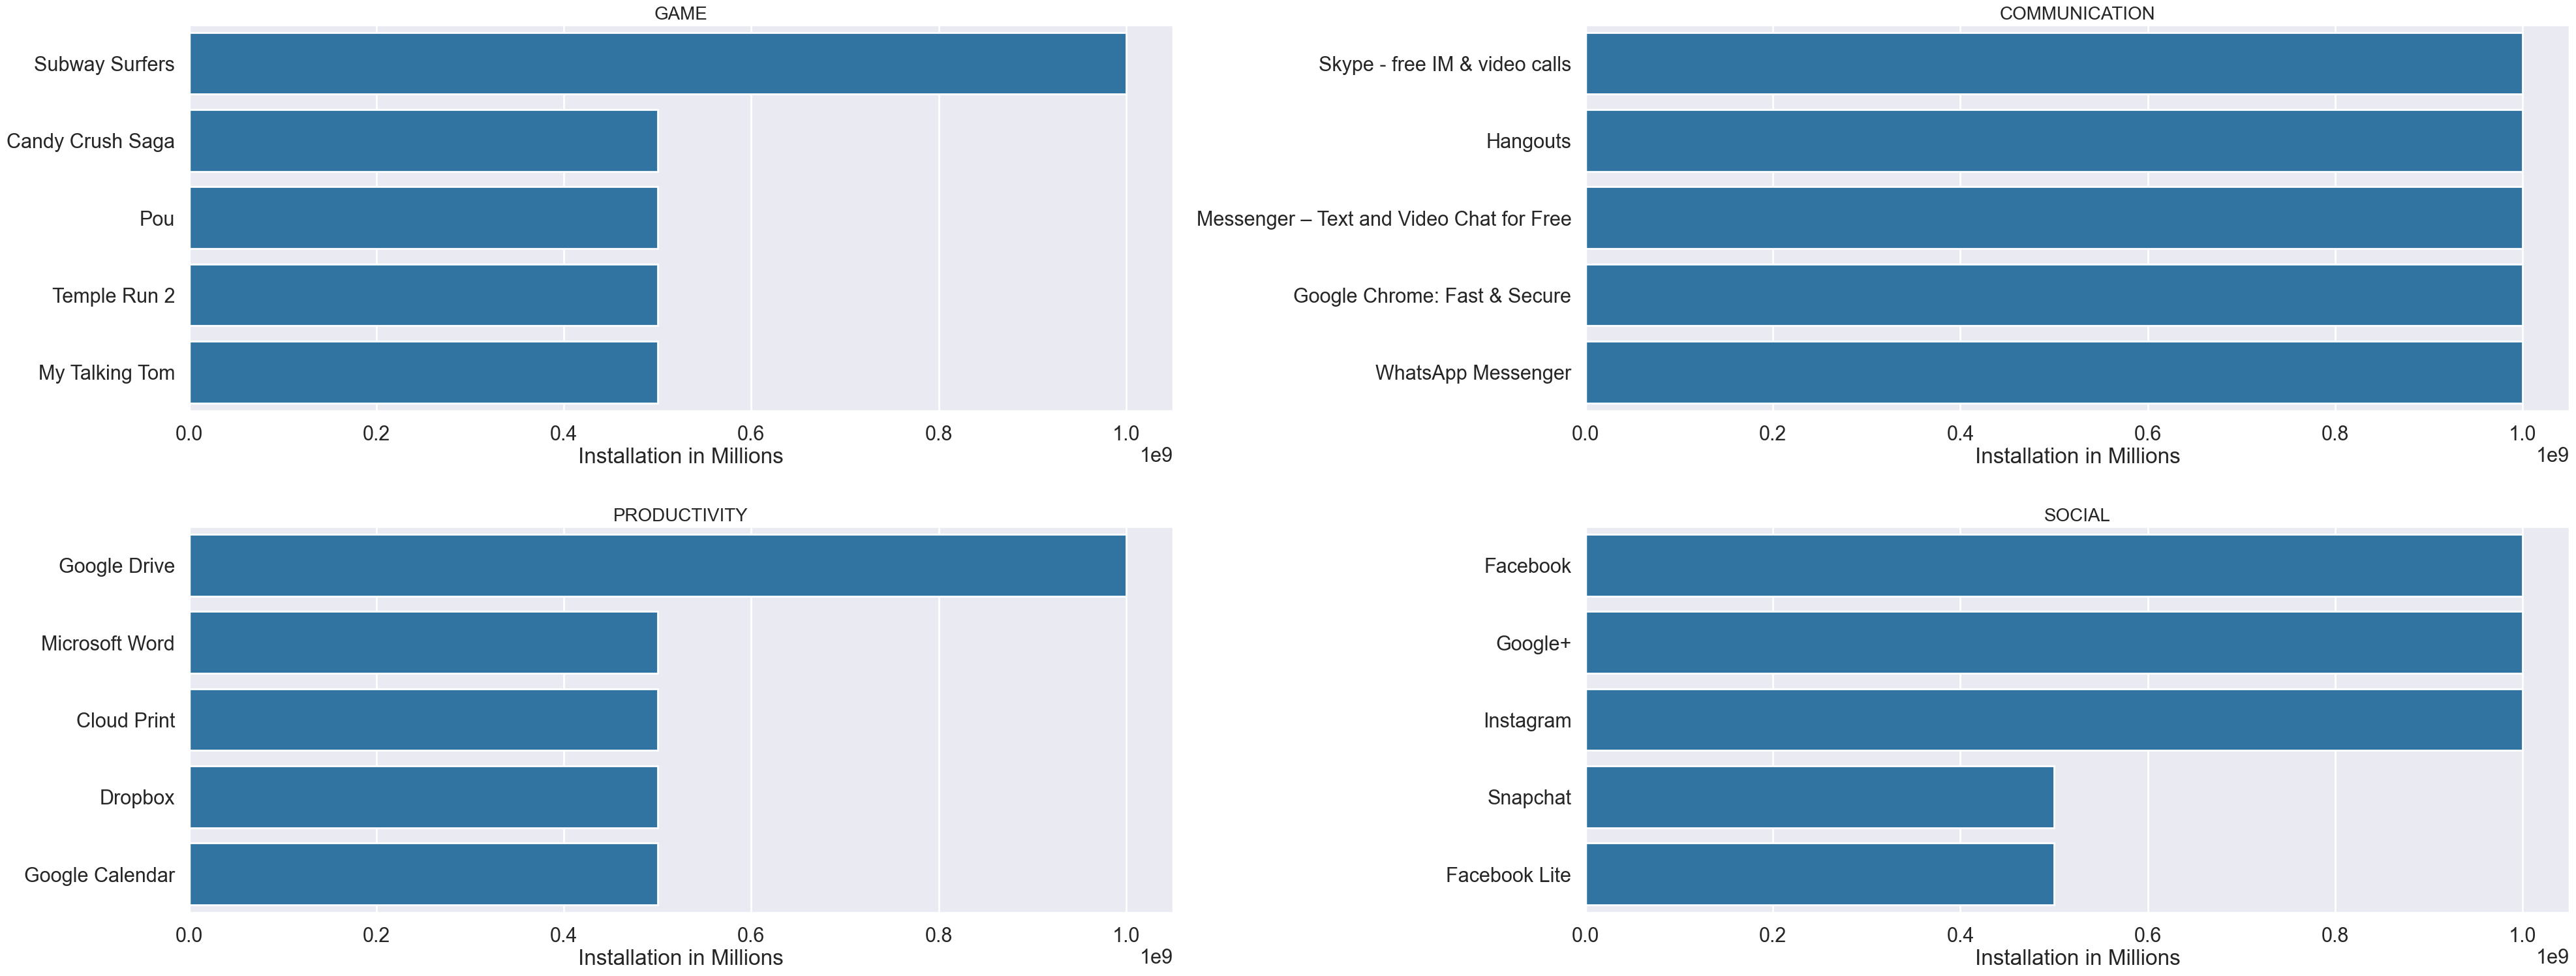

In [ ]:
dfa = dfcopy.groupby(['Category' ,'App'])['Installs'].sum().reset_index() ###ascending=False coktan aza dogru siralama yapar
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()